In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
codestral_categorization_data_file_name = "./cme_codestral-latest_by_category.csv"

In [3]:
codestral_categorization = pd.read_csv(codestral_categorization_data_file_name)
codestral_categorization.head()

,url,message,api_url,diff,c_why_in,c_why_in_expl,c_why_mw,c_why_mw_expl,c_why_di,c_why_di_expl,...,c_why_do,c_why_do_expl,c_what_sc,c_what_sc_expl,c_what_dip,c_what_dip_expl,c_what_if,c_what_if_expl,c_what_mw,c_what_mw_expl
0,https://github.com/junit-team/junit4/commit/31...,Relicense JUnit from CPL to EPL <enter> EPL i...,https://api.github.com/repos/junit-team/junit4...,"@@ -1,8 +1,8 @@\r\n JUnit\r\n \r\n-Common Publ...",True,The commit message explains the necessity of t...,True,The commit message clearly explains the reason...,True,The commit message explains the motivation for...,...,True,The commit message directly mentions the chang...,True,The commit message clearly describes the chang...,True,The commit message explains that the license o...,True,The commit message clearly states that the lic...,False,The commit message provides a clear explanatio...
1,https://github.com/spring-projects/spring-boot...,Better diagnotics when ESCF subclass breaks wi...,https://api.github.com/repos/spring-projects/s...,"@@ -17,6 +17,7 @@\r\n package org.springframew...",True,The commit message explains the necessity of c...,True,The commit message explains the necessity of c...,True,The commit message explains the motivation for...,...,True,The commit message directly mentions the impro...,True,The commit message describes the changes made ...,True,The commit message explains that the changes a...,True,The commit message describes the changes made ...,False,The commit message does not lack an explanatio...
2,https://github.com/spring-projects/spring-boot...,Update view of bean types when an override is ...,https://api.github.com/repos/spring-projects/s...,"@@ -76,7 +76,7 @@ final class BeanTypeRegistry...",True,The commit message refers to the necessity of ...,True,The commit message explains the necessity of c...,True,The commit message clearly explains the proble...,...,True,The commit message directly mentions the issue...,True,The commit message 'Update view of bean types ...,True,The commit message explains that the changes a...,True,The commit message accurately describes the ch...,False,The commit message explains the reason for the...
3,https://github.com/square/okhttp/commit/868ee8...,Drop our one remaining DSS cipher suite. <ent...,https://api.github.com/repos/square/okhttp/com...,"@@ -37,7 +37,7 @@\r\n */\r\n public final cla...",True,The commit message refers to the necessity of ...,True,The commit message 'Drop our one remaining DSS...,True,The commit message explains the motivation for...,...,True,The commit message directly mentions the chang...,True,The commit message 'Drop our one remaining DSS...,True,The commit message explains that the change is...,True,The commit message expresses a change in the c...,False,The commit message does not lack an explanatio...
4,https://github.com/spring-projects/spring-boot...,Fix undertow access_log file name <enter> Und...,https://api.github.com/repos/spring-projects/s...,"@@ -384,7 +384,7 @@ private AccessLogHandler c...",True,The commit message refers to a change in Under...,True,The commit message 'Fix undertow access_log fi...,True,The commit message explains the necessity of c...,...,True,The commit message directly mentions the defec...,True,The commit message 'Fix undertow access_log fi...,False,The commit message does not explicitly describ...,True,The commit message 'Fix undertow access_log fi...,False,The commit message does provide an explanation...


In [4]:
why_columns = ['c_why_in', 'c_why_mw', 'c_why_di', 'c_why_ir', 'c_why_do']
what_columns = ['c_what_sc', 'c_what_dip', 'c_what_if', 'c_what_mw']

In [5]:
non_nan_rows_why = codestral_categorization[why_columns]
non_nan_rows_why = non_nan_rows_why.dropna()
non_nan_rows_why

,c_why_in,c_why_mw,c_why_di,c_why_ir,c_why_do
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
266,True,True,True,True,True
267,True,True,True,True,True
268,True,True,True,True,True
269,True,True,True,True,True


In [6]:
non_nan_rows_what = codestral_categorization[what_columns]
non_nan_rows_what = non_nan_rows_what.dropna()
non_nan_rows_what

,c_what_sc,c_what_dip,c_what_if,c_what_mw
0,True,True,True,False
1,True,True,True,False
2,True,True,True,False
3,True,True,True,False
4,True,False,True,False
...,...,...,...,...
266,True,True,True,True
267,True,True,True,False
268,True,True,True,False
269,True,True,True,False


In [7]:
num_rows = non_nan_rows_why.shape[0]
num_rows

262

In [8]:
def count_rows_with_false(df, num):
    return (df == False).sum(axis=1).eq(num).sum()

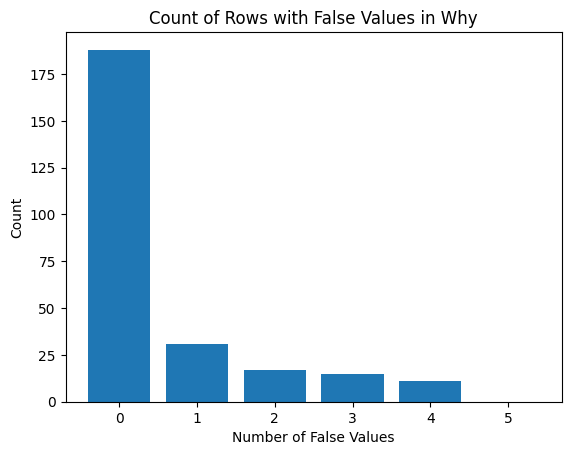

In [9]:
count = []
for i in range(6):
    count.append(count_rows_with_false(non_nan_rows_why, i))

plt.bar(range(6), count)
plt.xlabel('Number of False Values')
plt.ylabel('Count')
plt.title('Count of Rows with False Values in Why')
plt.show()

In [10]:
num_rows = non_nan_rows_what.shape[0]
num_rows

262

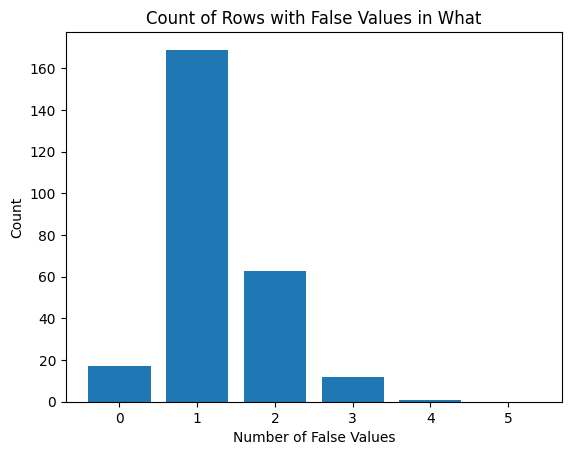

In [11]:
count = []
for i in range(6):
    count.append(count_rows_with_false(non_nan_rows_what, i))

plt.bar(range(6), count)
plt.xlabel('Number of False Values')
plt.ylabel('Count')
plt.title('Count of Rows with False Values in What')
plt.show()